In [132]:
from pycoingecko import CoinGeckoAPI

cg = CoinGeckoAPI()
top_coins = cg.get_coins_markets(vs_currency='usd', order='market_cap_desc', per_page=50, page=1)
for coin in top_coins:
    market_cap = coin['market_cap']
    print(coin['name'], "{:,.2f}".format(market_cap / 1e9))
    print(coin)


Bitcoin 1,377.55
{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin', 'image': 'https://coin-images.coingecko.com/coins/images/1/large/bitcoin.png?1696501400', 'current_price': 69694, 'market_cap': 1377549729771, 'market_cap_rank': 1, 'fully_diluted_valuation': 1462765206542, 'total_volume': 43583462283, 'high_24h': 71500, 'low_24h': 68850, 'price_change_24h': 551.77, 'price_change_percentage_24h': 0.79803, 'market_cap_change_24h': 5014012580, 'market_cap_change_percentage_24h': 0.36531, 'circulating_supply': 19776615.0, 'total_supply': 21000000.0, 'max_supply': 21000000.0, 'ath': 73738, 'ath_change_percentage': -5.56259, 'ath_date': '2024-03-14T07:10:36.635Z', 'atl': 67.81, 'atl_change_percentage': 102594.62124, 'atl_date': '2013-07-06T00:00:00.000Z', 'roi': None, 'last_updated': '2024-11-02T06:57:17.352Z'}
Ethereum 302.09
{'id': 'ethereum', 'symbol': 'eth', 'name': 'Ethereum', 'image': 'https://coin-images.coingecko.com/coins/images/279/large/ethereum.png?1696501628', 'current_price

In [133]:
#create a list of coin names
coin_names = [coin['name'] for coin in top_coins]
print(coin_names)
#coin_names = coin_names[5:]

['Bitcoin', 'Ethereum', 'Tether', 'BNB', 'Solana', 'USDC', 'XRP', 'Lido Staked Ether', 'Dogecoin', 'TRON', 'Cardano', 'Toncoin', 'Wrapped stETH', 'Shiba Inu', 'Wrapped Bitcoin', 'Avalanche', 'WETH', 'Chainlink', 'Bitcoin Cash', 'USDS', 'Polkadot', 'LEO Token', 'Sui', 'Litecoin', 'NEAR Protocol', 'Aptos', 'Wrapped eETH', 'Uniswap', 'Pepe', 'Internet Computer', 'Bittensor', 'Dai', 'Artificial Superintelligence Alliance', 'Monero', 'Kaspa', 'Stellar', 'Ethereum Classic', 'Ethena USDe', 'WhiteBIT Coin', 'First Digital USD', 'POL (ex-MATIC)', 'Stacks', 'OKB', 'dogwifhat', 'Aave', 'Arbitrum', 'Filecoin', 'Cronos', 'Mantle', 'THORChain']


In [134]:
from pytrends.request import TrendReq
import pandas as pd 

pytrends = TrendReq(hl='en-US', tz=360)

# Initialize an empty DataFrame to hold the combined data
combined_data = pd.DataFrame()
# Initialize an empty list to hold the DataFrames
dataframes = []

# Split the list into chunks of 5
for i in range(0, len(coin_names), 5):
    chunk = coin_names[i:i+5]  # Create a sub-list of 5 names
    
    pytrends.build_payload(chunk, timeframe='today 3-m')  # Get data for the current chunk
    #pytrends.build_payload(chunk, timeframe='today 1-m')  # Fetching 1 month of data

    data = pytrends.interest_over_time()  # Fetch search trends data

    # Check if 'isPartial' column exists, and if so, drop it
    if 'isPartial' in data.columns:
        data = data.drop(columns=['isPartial'])
    
    # Append the DataFrame to the list
    dataframes.append(data)


# Concatenate all DataFrames together
combined_data = pd.concat(dataframes)

# Resample the data to daily frequency, taking the mean for each day
daily_data = combined_data.resample('D').mean()

# Reset the index of the combined DataFrame
daily_data.reset_index(inplace=True)



In [135]:
daily_data.head()

date  Bitcoin  Ethereum  Tether  BNB  Solana  USDC   XRP  \
0 2024-08-02     32.0       4.0     1.0  5.0     3.0   3.0  37.0   
1 2024-08-03     32.0       4.0     1.0  5.0     3.0   3.0  31.0   
2 2024-08-04     34.0       6.0     1.0  6.0     4.0   3.0  31.0   
3 2024-08-05    100.0      13.0     1.0  6.0     5.0   5.0  49.0   
4 2024-08-06     58.0       7.0     1.0  6.0     4.0   4.0  36.0   

   Lido Staked Ether  Dogecoin  ...  POL (ex-MATIC)  Stacks   OKB  dogwifhat  \
0                0.0       9.0  ...             0.0    81.0  12.0        2.0   
1                0.0       8.0  ...             0.0    89.0  10.0        3.0   
2                0.0       8.0  ...             0.0    85.0  11.0        0.0   
3                0.0      17.0  ...             0.0    76.0  12.0        4.0   
4                0.0      12.0  ...             0.0    85.0  12.0        4.0   

   Aave  Arbitrum  Filecoin  Cronos  Mantle  THORChain  
0  29.0       8.0       4.0    53.0    59.0        0.0  
1  28.0       5.0       2.0    52.0    67.0        0.0  
2  30.0       6.0       2.0    44.0    67.0        0.0  
3  36.0      12.0       4.0    55.0    67.0        0.0  
4  30.0       8.0       3.0    53.0    69.0        0.0  

[5 rows x 51 columns]

In [136]:
daily_data.describe()

Bitcoin   Ethereum  Tether        BNB     Solana       USDC  \
count   93.000000  93.000000    93.0  93.000000  93.000000  93.000000   
mean    29.623656   3.645161     1.0   4.892473   2.817204   3.483871   
std      9.037259   1.324068     0.0   0.476910   0.658494   0.563624   
min     20.000000   2.000000     1.0   4.000000   2.000000   2.000000   
25%     26.000000   3.000000     1.0   5.000000   2.000000   3.000000   
50%     28.000000   3.000000     1.0   5.000000   3.000000   3.000000   
75%     30.000000   4.000000     1.0   5.000000   3.000000   4.000000   
max    100.000000  13.000000     1.0   6.000000   5.000000   5.000000   

              XRP  Lido Staked Ether   Dogecoin       TRON  ...  \
count   93.000000               93.0  93.000000  93.000000  ...   
mean    32.870968                0.0  10.279570  27.387097  ...   
std     10.224891                0.0   4.022668   4.016359  ...   
min     22.000000                0.0   7.000000  23.000000  ...   
25%     27.000000                0.0   8.000000  25.000000  ...   
50%     30.000000                0.0   9.000000  26.000000  ...   
75%     36.000000                0.0  11.000000  29.000000  ...   
max    100.000000                0.0  35.000000  49.000000  ...   

       POL (ex-MATIC)      Stacks        OKB  dogwifhat       Aave   Arbitrum  \
count            93.0   93.000000  93.000000  93.000000  93.000000  93.000000   
mean              0.0   82.311828  12.365591   2.290323  32.258065   7.645161   
std               0.0    5.175146   1.480195   1.619049   4.331139   1.265299   
min               0.0   71.000000   9.000000   0.000000  26.000000   5.000000   
25%               0.0   78.000000  12.000000   2.000000  29.000000   7.000000   
50%               0.0   82.000000  12.000000   2.000000  31.000000   8.000000   
75%               0.0   85.000000  13.000000   3.000000  35.000000   8.000000   
max               0.0  100.000000  16.000000   8.000000  46.000000  12.000000   

        Filecoin     Cronos      Mantle  THORChain  
count  93.000000  93.000000   93.000000  93.000000  
mean    2.924731  56.817204   78.978495   0.311828  
std     6.352399   6.008954   10.004324   0.531170  
min     0.000000  44.000000   55.000000   0.000000  
25%     2.000000  53.000000   72.000000   0.000000  
50%     2.000000  56.000000   80.000000   0.000000  
75%     3.000000  62.000000   87.000000   1.000000  
max    63.000000  76.000000  100.000000   2.000000  

[8 rows x 50 columns]

## die standardabweichung wird von 1M genommen

In [137]:
# Calculate standard deviation and mean
std_dev = daily_data[:-30].std()
mean_values = daily_data[:-30].mean()

C:\Users\weiss\AppData\Local\Temp\ipykernel_43560\524788527.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = daily_data[:-30].mean()


In [138]:
# Define an alert function for the last 30 days
def check_alerts_last_X_days(data, mean_values, std_dev, days= 30):
    alerts = {}

    # Loop through the last 30 days of data
    last_30_days = data.tail(days)
    for index, row in last_30_days.iterrows():
        for coin in data.columns[1:]:  # Skip the 'date' column
            # Check if the value exceeds mean + std
            
            if not pd.isna(row[coin]) and row[coin] > mean_values[coin] + std_dev[coin]:
                # Record the value and the date for the alert
                if coin not in alerts:
                    alerts[coin] = []
                alerts[coin].append(("positiv", row['date'], row[coin]))
            
           # negativ 
           # if pd.isna(row[coin]) or row[coin] < mean_values[coin] - std_dev[coin]:
                # Record the value and the date for the alert
            #    if coin not in alerts:
             #       alerts[coin] = []
              #  alerts[coin].append(("negativ", row['date'], row[coin]))

    return alerts


DAYS = 30
# Check alerts for the last 30 days
alerts_last_X_days = check_alerts_last_X_days(daily_data, mean_values, std_dev, DAYS)
#print(alerts_last_X_days)
if alerts_last_X_days:
    print(f"Alerts over the last {DAYS} days:")
    for coin, alert_details in alerts_last_X_days.items():
        print(f"{coin} :")
        for tag, date, value in alert_details:
            print(f" Tag: {tag}  Date: {date}, Value: {value}")
else:
    print(f"No alerts in the last {DAYS} days.")


Alerts over the last 30 days:
Avalanche :
 Tag: positiv  Date: 2024-10-04 00:00:00, Value: 50.0
 Tag: positiv  Date: 2024-10-05 00:00:00, Value: 43.0
 Tag: positiv  Date: 2024-10-06 00:00:00, Value: 47.0
 Tag: positiv  Date: 2024-10-07 00:00:00, Value: 43.0
 Tag: positiv  Date: 2024-10-08 00:00:00, Value: 44.0
 Tag: positiv  Date: 2024-10-09 00:00:00, Value: 50.0
 Tag: positiv  Date: 2024-10-10 00:00:00, Value: 88.0
 Tag: positiv  Date: 2024-10-11 00:00:00, Value: 46.0
 Tag: positiv  Date: 2024-10-12 00:00:00, Value: 55.0
 Tag: positiv  Date: 2024-10-13 00:00:00, Value: 85.0
 Tag: positiv  Date: 2024-10-14 00:00:00, Value: 57.0
 Tag: positiv  Date: 2024-10-15 00:00:00, Value: 85.0
 Tag: positiv  Date: 2024-10-16 00:00:00, Value: 57.0
 Tag: positiv  Date: 2024-10-17 00:00:00, Value: 100.0
 Tag: positiv  Date: 2024-10-18 00:00:00, Value: 60.0
 Tag: positiv  Date: 2024-10-19 00:00:00, Value: 93.0
 Tag: positiv  Date: 2024-10-20 00:00:00, Value: 58.0
 Tag: positiv  Date: 2024-10-21 00:00:0

In [139]:
# Function to get ticker name by the crypto name
def get_ticker_name(crypto_data, crypto_name):
    # Loop through each item in the list to find a match by name
    for coin in crypto_data:
        if coin['name'].lower() == crypto_name.lower():
            return coin['symbol']
    return None

In [140]:
#create a list of coin names from alerts
coin_names = [coin for coin in alerts_last_X_days]
print(coin_names)

['Avalanche', 'Sui', 'WETH', 'USDC', 'Internet Computer', 'Bittensor', 'dogwifhat', 'Arbitrum', 'THORChain', 'Mantle', 'OKB', 'Aave', 'Cronos', 'Wrapped Bitcoin', 'Dogecoin', 'Bitcoin Cash', 'LEO Token', 'Cardano', 'Shiba Inu', 'Dai', 'Stacks', 'Solana', 'Kaspa', 'Bitcoin', 'Chainlink', 'NEAR Protocol']


In [141]:
# Create ticker list using list comprehension
coin_tickers = [f"{get_ticker_name(top_coins,name)}USDT".upper() for name in coin_names]
coin_tickers


['AVAXUSDT',
 'SUIUSDT',
 'WETHUSDT',
 'USDCUSDT',
 'ICPUSDT',
 'TAOUSDT',
 'WIFUSDT',
 'ARBUSDT',
 'RUNEUSDT',
 'MNTUSDT',
 'OKBUSDT',
 'AAVEUSDT',
 'CROUSDT',
 'WBTCUSDT',
 'DOGEUSDT',
 'BCHUSDT',
 'LEOUSDT',
 'ADAUSDT',
 'SHIBUSDT',
 'DAIUSDT',
 'STXUSDT',
 'SOLUSDT',
 'KASUSDT',
 'BTCUSDT',
 'LINKUSDT',
 'NEARUSDT']

 ## filter stablecoins

In [142]:
 # filter stablecoins
 coin_tickers = list(filter(lambda x: x not in ['USDTUSDT', 'USDCUSDT', 'DAIUSDT'], coin_tickers))
 coin_tickers

['AVAXUSDT',
 'SUIUSDT',
 'WETHUSDT',
 'ICPUSDT',
 'TAOUSDT',
 'WIFUSDT',
 'ARBUSDT',
 'RUNEUSDT',
 'MNTUSDT',
 'OKBUSDT',
 'AAVEUSDT',
 'CROUSDT',
 'WBTCUSDT',
 'DOGEUSDT',
 'BCHUSDT',
 'LEOUSDT',
 'ADAUSDT',
 'SHIBUSDT',
 'STXUSDT',
 'SOLUSDT',
 'KASUSDT',
 'BTCUSDT',
 'LINKUSDT',
 'NEARUSDT']

## es werden 3M preisdaten verwendet

In [143]:
import ccxt
import time

# Synchronize timestamps
timestamp = int(time.time() * 1000)


# Instantiate the Bybit testnet exchange
bybit = ccxt.bybit({
    'apiKey': 'AooQYM5vkaitEZi4Ub',
    'secret': '',
    'enableRateLimit': True,
    'options': {
        'defaultType': 'spot',  # or 'future' for derivatives
            'recvWindow': 1400,    # Adjusting the receive window
    },
    'urls': {
        'api': {
            'public': 'https://api.bybit.com',
            'private': 'https://api.bybit.com',
        }
    }
})

crypto_data = []

for ticker in coin_tickers:
     try:
        # Fetch OHLCV data (for example, the last 100 candles of 1-hour intervals)
        data = bybit.fetch_ohlcv(ticker, timeframe='1d', limit=90)

        # Transforming to DataFrame
        df = pd.DataFrame(data, columns=['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

        # Convert timestamp to datetime and create a new column 'date'
        df['Date'] = pd.to_datetime(df['timestamp'], unit='ms')

        # Drop the original timestamp column
        df.drop(columns=['timestamp'], inplace=True)
        df.set_index('Date', inplace=True)

        crypto_data.append(df)
            
     except ccxt.BaseError as e:
        #filter not found ticker
        coin_tickers = list(filter(lambda x: x not in [ticker], coin_tickers))
        print(f"Error fetching data for {ticker}: {e}")
        continue  # Move to the next ticker



combined_df = pd.concat(crypto_data, keys=coin_tickers)

combined_df.reset_index(inplace=True)  # Reset the index to get Date and Ticker in columns
combined_df.rename(columns={'level_0': 'Ticker'}, inplace=True)  # Rename the newly added index column

# Set Date as index (if preferred)
combined_df.set_index('Date', inplace=True)







Error fetching data for WETHUSDT: bybit does not have market symbol WETHUSDT
Error fetching data for OKBUSDT: bybit does not have market symbol OKBUSDT
Error fetching data for LEOUSDT: bybit does not have market symbol LEOUSDT


In [144]:
print(combined_df.columns)  # To check column names
tickers = combined_df['Ticker'].unique()  # List of unique tickers in the DataFrame
tickers

Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


array(['AVAXUSDT', 'SUIUSDT', 'ICPUSDT', 'TAOUSDT', 'WIFUSDT', 'ARBUSDT',
       'RUNEUSDT', 'MNTUSDT', 'AAVEUSDT', 'CROUSDT', 'WBTCUSDT',
       'DOGEUSDT', 'BCHUSDT', 'ADAUSDT', 'SHIBUSDT', 'STXUSDT', 'SOLUSDT',
       'KASUSDT', 'BTCUSDT', 'LINKUSDT', 'NEARUSDT'], dtype=object)

In [145]:
combined_df.head()

Ticker     Open     High      Low    Close       Volume
Date                                                                 
2024-08-05  AVAXUSDT  21.2568  21.3880  17.2706  19.5425  2933621.353
2024-08-06  AVAXUSDT  19.5425  21.4577  19.5089  20.8905   819321.672
2024-08-07  AVAXUSDT  20.8905  21.6924  19.7081  19.8545   595393.377
2024-08-08  AVAXUSDT  19.8545  22.8497  19.5321  22.7418   469299.028
2024-08-09  AVAXUSDT  22.7418  22.8030  21.2766  21.7491   341205.076

In [146]:
import matplotlib.pyplot as plt

def alert_on_std(df, tickers, top_coins , days):
    alerts = []

    # Extract symbols from tickers by removing 'USDT'
    ticker_symbols = {(ticker[:-4]).lower() for ticker in tickers}  # Assumes 'USDT' is always 4 characters long
   
    # Filter top_coins to only include those whose symbol matches with tickers
    filtered_top_coins = [
        coin for coin in top_coins if coin['symbol'] in ticker_symbols
    ]

    
    # Zip the tickers and top_coins together and sort based on the market cap in ascending order
    sorted_coins = sorted(filtered_top_coins, key=lambda x: x['market_cap'])

    for coin in sorted_coins:
        # Filter the DataFrame for the given ticker
     
        ticker = f"{coin['symbol']}usdt".upper()

        ticker_data = df[df['Ticker'] == ticker ]

        # Calculate the mean and 1std for the 'Close' prices of the ticker
        mean_close = ticker_data['Close'][:-34].mean()
        std_close = ticker_data['Close'][:-34].std()
        #print(ticker, mean_close, std_close)
        threshold = mean_close + std_close
        
        # Check if any of the 'Close' prices in the last 'x' days are above the threshold
        if ticker_data['Close'][-days:].max() > threshold:
            alerts.append(f"Alert: {ticker} close price exceeded 1std (Threshold: {threshold:.2f}) in the last {days} days")

            # Plot the price data
            plt.figure(figsize=(10, 5))
            plt.plot(ticker_data.index, ticker_data['Close'], label=f"{ticker} Close Price")
            plt.axhline(threshold, color='r', linestyle='--', label=f"Threshold (1std)")
            plt.title(f" {'{:,.2f}'.format(coin['market_cap'] / 1e9)} {ticker} Close Price and Threshold Alert")
            plt.xlabel("Date")
            plt.ylabel("Close Price")
            plt.legend()
            plt.show()

    
    return alerts


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

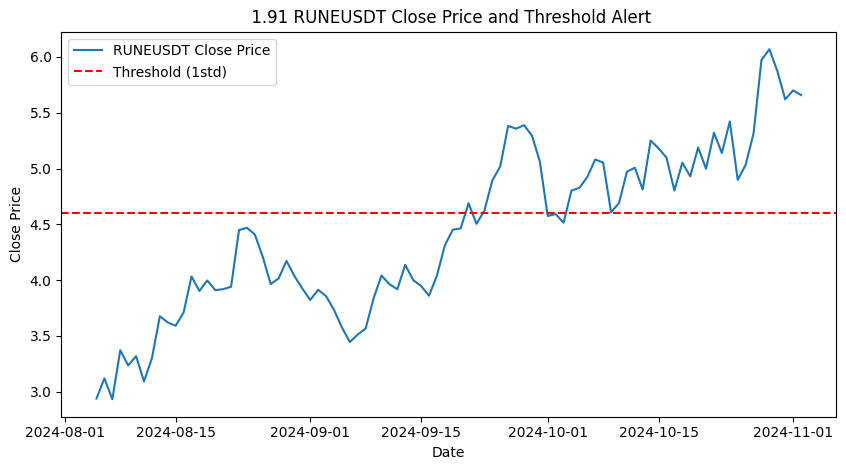

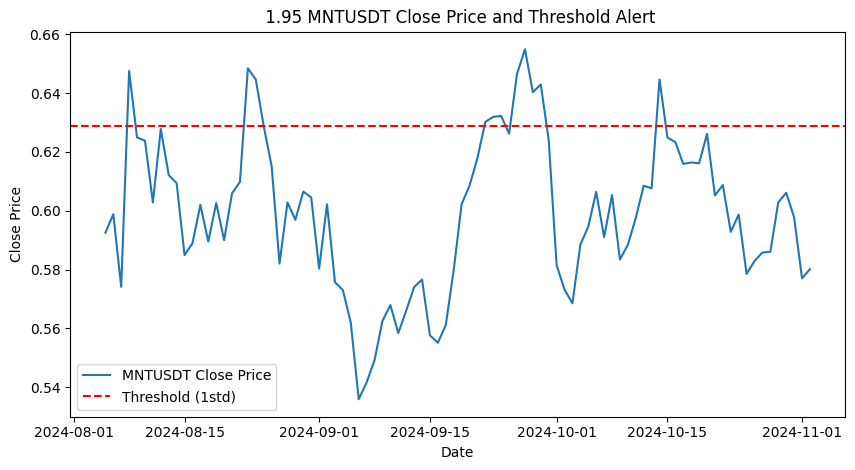

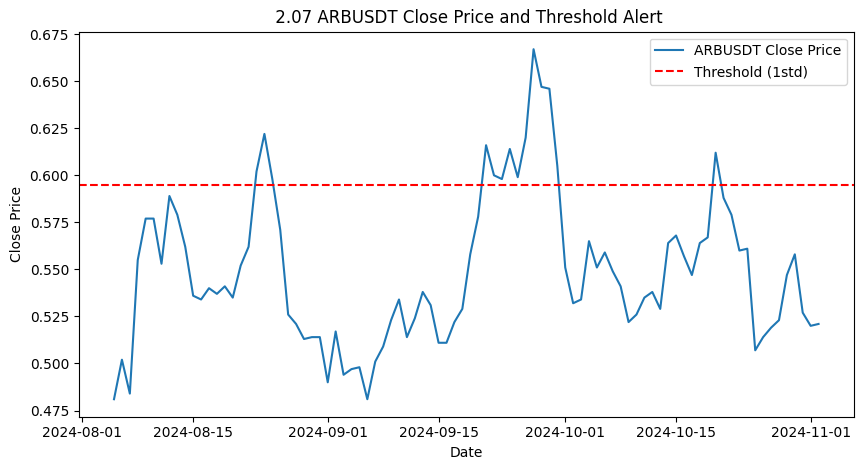

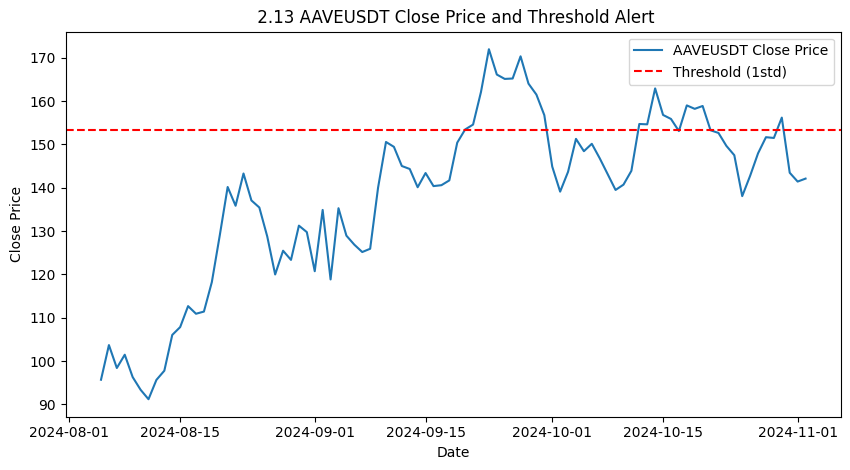

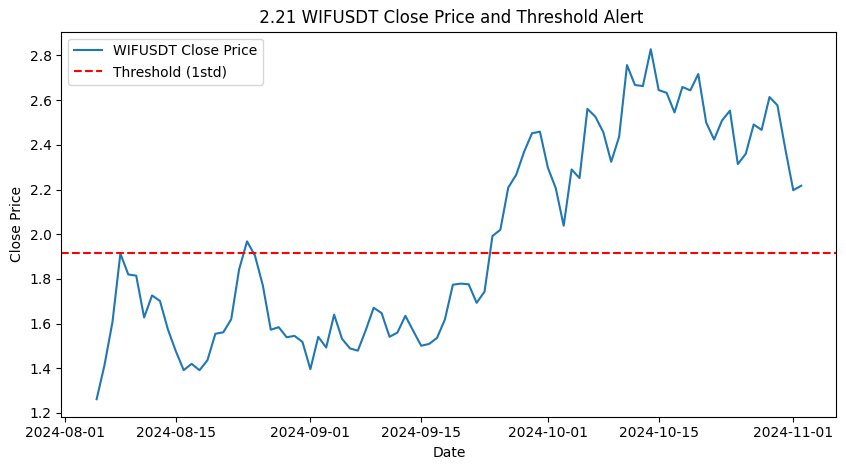

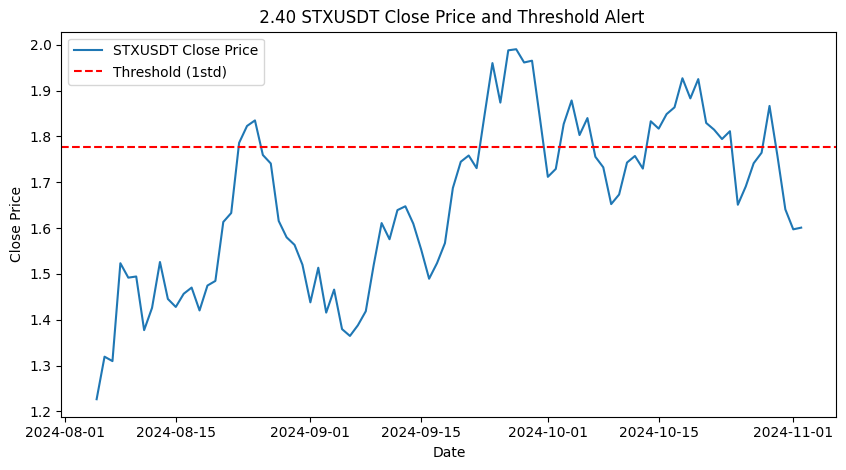

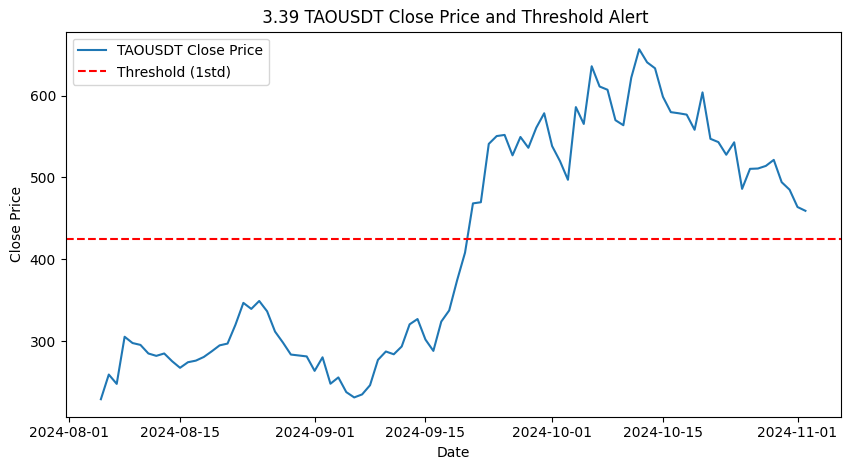

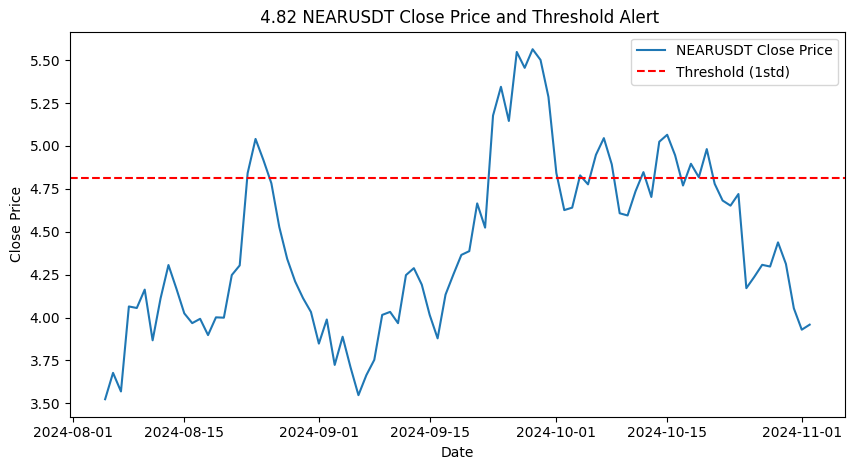

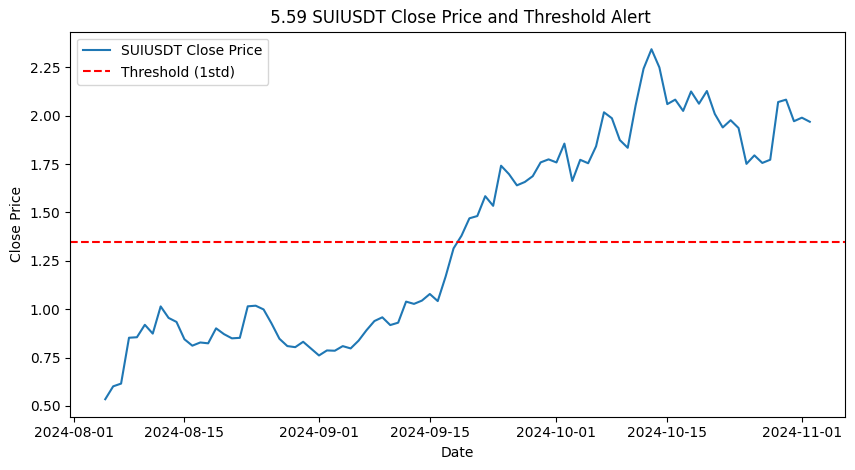

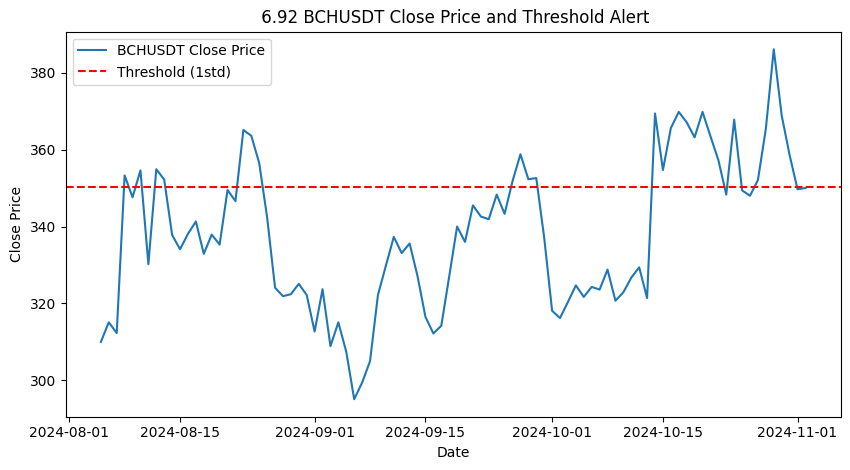

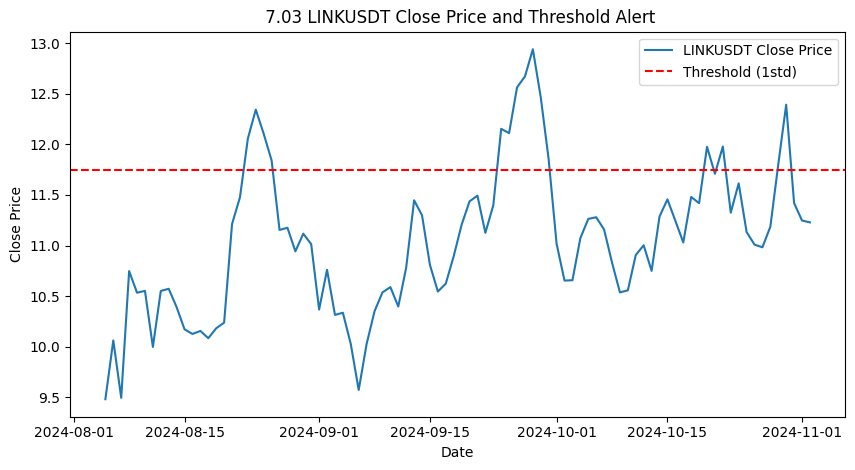

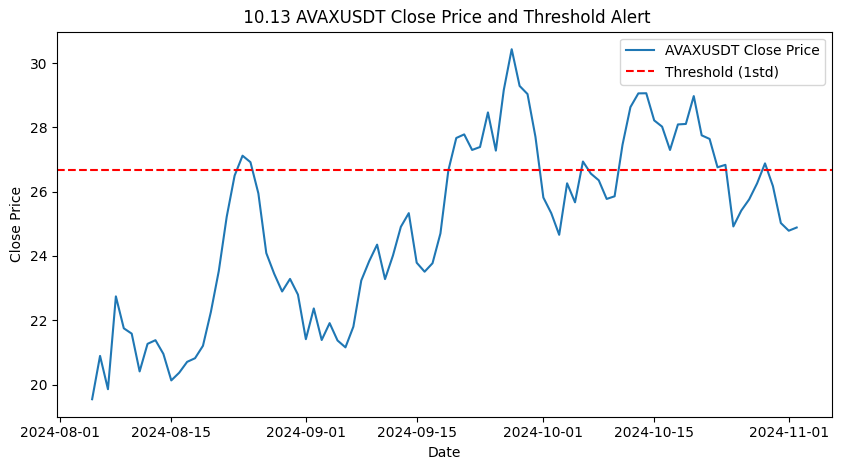

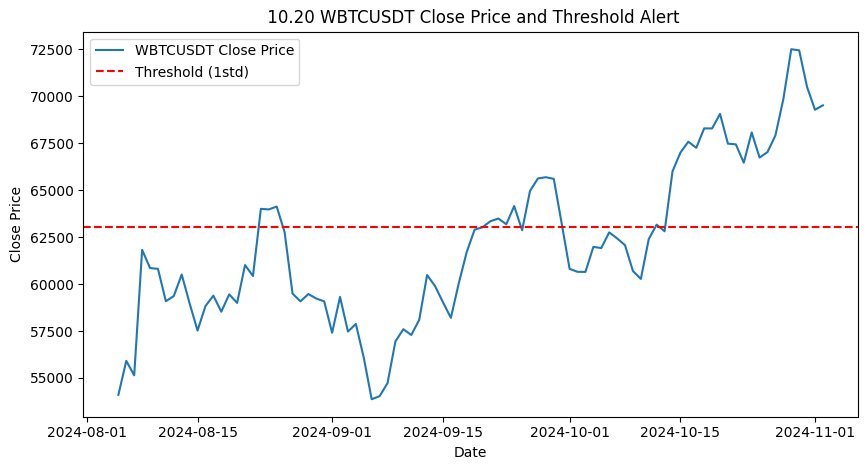

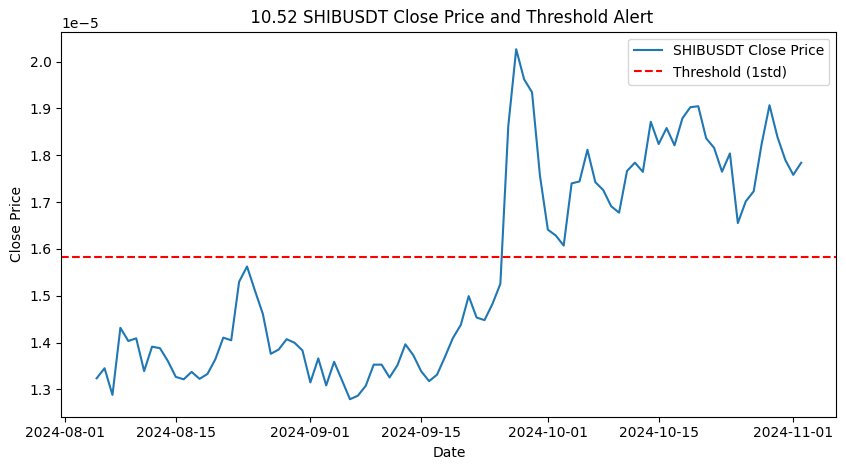

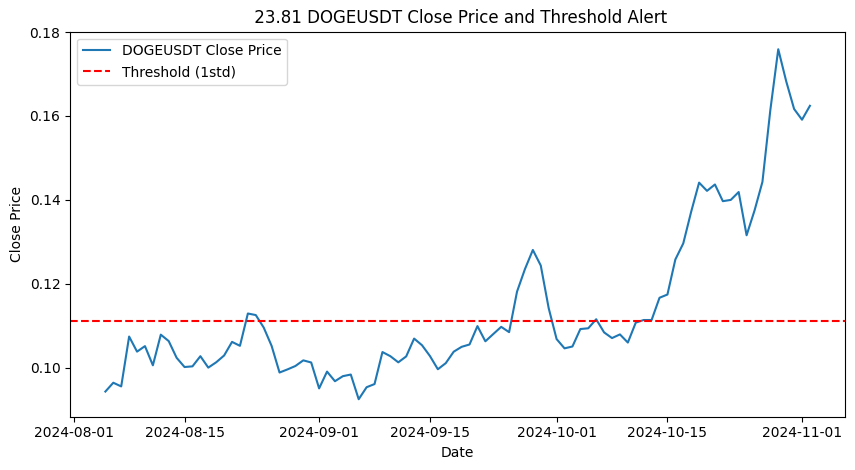

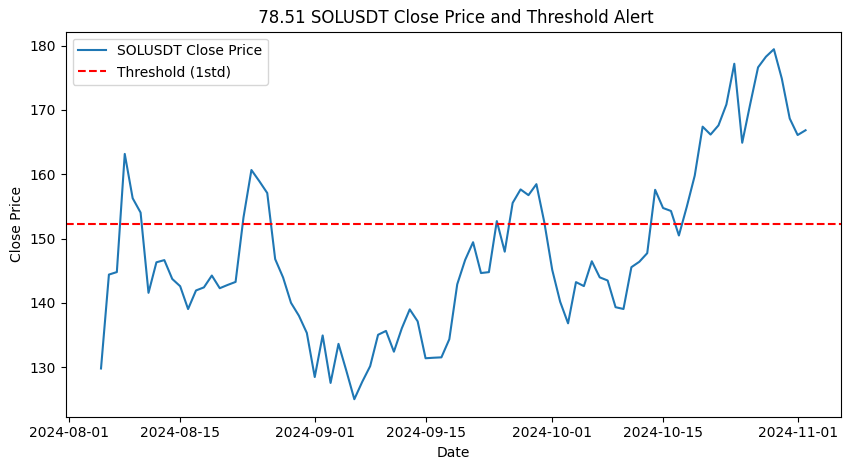

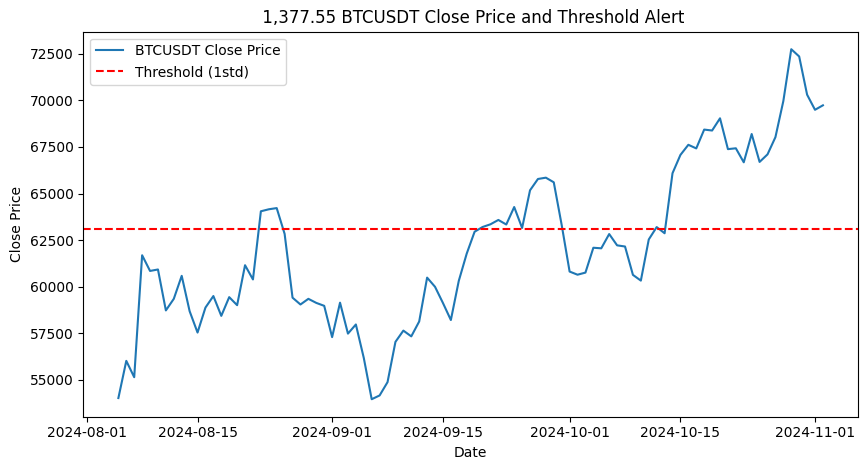

In [147]:
alert_on_std(combined_df, tickers, top_coins, 30);

## run backtest on alerts

In [148]:
import backtrader as bt
import matplotlib.pyplot as plt

plt.style.use("default")  # ggplot is also fine
plt.rcParams["figure.figsize"] = (12, 10)


class BollingerBandLimitStrategy(bt.Strategy):
    def __init__(self):
        # Bollinger Bands for price
        #self.bollinger_entry_first = bt.indicators.BollingerBands(self.data, period=34,  devfactor=0.5)
        self.bollinger_entry = ExponentionalBollingerBand(self.data, period=34,  devfactor=0.5)
        
        
        #self.bollinger_entry_two = bt.indicators.BollingerBands(self.data.close, period=34, devfactor=1)
        #self.bollinger_entry_two = ExponentionalBollingerBand(self.data, period=34, devfactor=2)

        # Create a custom indicator for volume plotting
        self.bollinger_entry_volume = VolumeBollingerBand(self.data, period= 34, devfactor = 1)
     
        self.rsiDivergence = RSIDivergence(self.data)

    def next(self):
        upper_band_entry = self.bollinger_entry.lines.top  # Upper band at 1 std
        #upper_band_entry_two = self.bollinger_entry_two.lines.top # Upper band at 2std
        upper_band_entry_volume = self.bollinger_entry_volume.lines.top


        if not self.position:  # Check if we are not in a position
            # If the price crosses above the upper band at 1 std, place a limit buy order
           #if self.data.close[0] >= upper_band_entry[0] and self.data.close[0] <= upper_band_entry_two[0] and self.data.volume[0] >= upper_band_entry_volume[0]:
            #if self.data.close[0] >= upper_band_entry[0] and self.rsiDivergence.divergence[0] == 1 and self.data.volume[0] >= upper_band_entry_volume[0]:
            if self.data.close[0] >= upper_band_entry[0] and self.data.volume[0] >= upper_band_entry_volume[0]:
            
                # Use all available cash for buying
                cash = self.broker.getcash()  # Get available cash
                size = cash / self.data.close[0]  # Calculate how much we can buy
                self.buy(size= size)

        elif self.position:  # We have an open position, so set conditions for exit
            if self.data.close[0] < upper_band_entry[0]:
                self.close()  # Close the position at market price


class ExponentionalBollingerBand(bt.Indicator):
    lines = ('mid', 'top', 'bot')
    plotinfo = dict(subplot=False) 
    
    def __init__(self, period = 34, devfactor = 1):

        # Plotting the Bollinger Bands (middle, top, and bottom bands)
        self.lines.mid = bt.indicators.WeightedMovingAverage(self.data.close, period=period, plot=True)
        stddev = bt.indicators.StandardDeviation(self.data.close, period=period)

        # Create the top and bottom lines by adding/subtracting the standard deviation to/from the mid line
        self.lines.top = self.lines.mid + stddev * devfactor
        self.lines.bot = self.lines.mid - stddev * devfactor

        # Set the color properties directly on the indicator level
        self.plotlines.top.color = 'orange'
        self.plotlines.bot.color = 'orange'
        self.plotlines.mid.color = 'blue'

class VolumeBollingerBand(bt.Indicator):
    lines = ('volume', 'mid', 'top', 'bot')  # Define all the lines to be plotted
    plotinfo = dict(subplot=True)  # Indicates this will be in a subplot

    def __init__(self, period = 34, devfactor = 1):
        # Primary volume line
        self.lines.volume = self.data.volume

        # Plotting the Bollinger Bands (middle, top, and bottom bands)
        self.lines.mid = bt.indicators.SimpleMovingAverage(self.data.volume, period=period, plot=True).lines.sma
        stddev = bt.indicators.StandardDeviation(self.data.volume, period=period)

        # Create the top and bottom lines by adding/subtracting the standard deviation to/from the mid line
        self.lines.top = self.lines.mid + stddev * devfactor
        self.lines.bot = self.lines.mid - stddev * devfactor

        # Set the color properties directly on the indicator level
        self.plotlines.top.color = 'orange'
        self.plotlines.bot.color = 'orange'
        self.plotlines.mid.color = 'blue'

class VolumeVolatility(bt.Indicator):
    lines = ('volatility',)
    params = (('period', 34),)

    def __init__(self):
        # Calculate the standard deviation of volume
        self.lines.volatility = bt.indicators.StandardDeviation(
            self.data.volume, period=self.params.period, plot=True)

class RSIDivergence(bt.Indicator):
    lines = ('divergence',)
    params = dict(period=34)

    def __init__(self, period= 34):
        self.rsi = bt.indicators.RSI(self.data, period=period)

    def next(self):
        # Check for a simple bullish divergence (price makes a lower low, RSI makes a higher low)
        if self.data.low[-1] < self.data.low[-2] and self.rsi[-1] > self.rsi[-2]:
            self.lines.divergence[0] = 1  # Bullish divergence signal
        # Check for a simple bearish divergence (price makes a higher high, RSI makes a lower high)
        elif self.data.high[-1] > self.data.high[-2] and self.rsi[-1] < self.rsi[-2]:
            self.lines.divergence[0] = -1  # Bearish divergence signal
        else:
            self.lines.divergence[0] = 0




AVAXUSDT


<IPython.core.display.Javascript object>

AutoOrderedDict([('total', AutoOrderedDict([('total', 1), ('open', 0), ('closed', 1)])), ('streak', AutoOrderedDict([('won', AutoOrderedDict([('current', 0), ('longest', 0)])), ('lost', AutoOrderedDict([('current', 1), ('longest', 1)]))])), ('pnl', AutoOrderedDict([('gross', AutoOrderedDict([('total', -316.55539719450815), ('average', -316.55539719450815)])), ('net', AutoOrderedDict([('total', -316.55539719450815), ('average', -316.55539719450815)]))])), ('won', AutoOrderedDict([('total', 0), ('pnl', AutoOrderedDict([('total', 0.0), ('average', 0.0), ('max', 0.0)]))])), ('lost', AutoOrderedDict([('total', 1), ('pnl', AutoOrderedDict([('total', -316.55539719450815), ('average', -316.55539719450815), ('max', -316.55539719450815)]))])), ('long', AutoOrderedDict([('total', 1), ('pnl', AutoOrderedDict([('total', -316.55539719450815), ('average', -316.55539719450815), ('won', AutoOrderedDict([('total', 0.0), ('average', 0.0), ('max', 0.0)])), ('lost', AutoOrderedDict([('total', -316.55539719

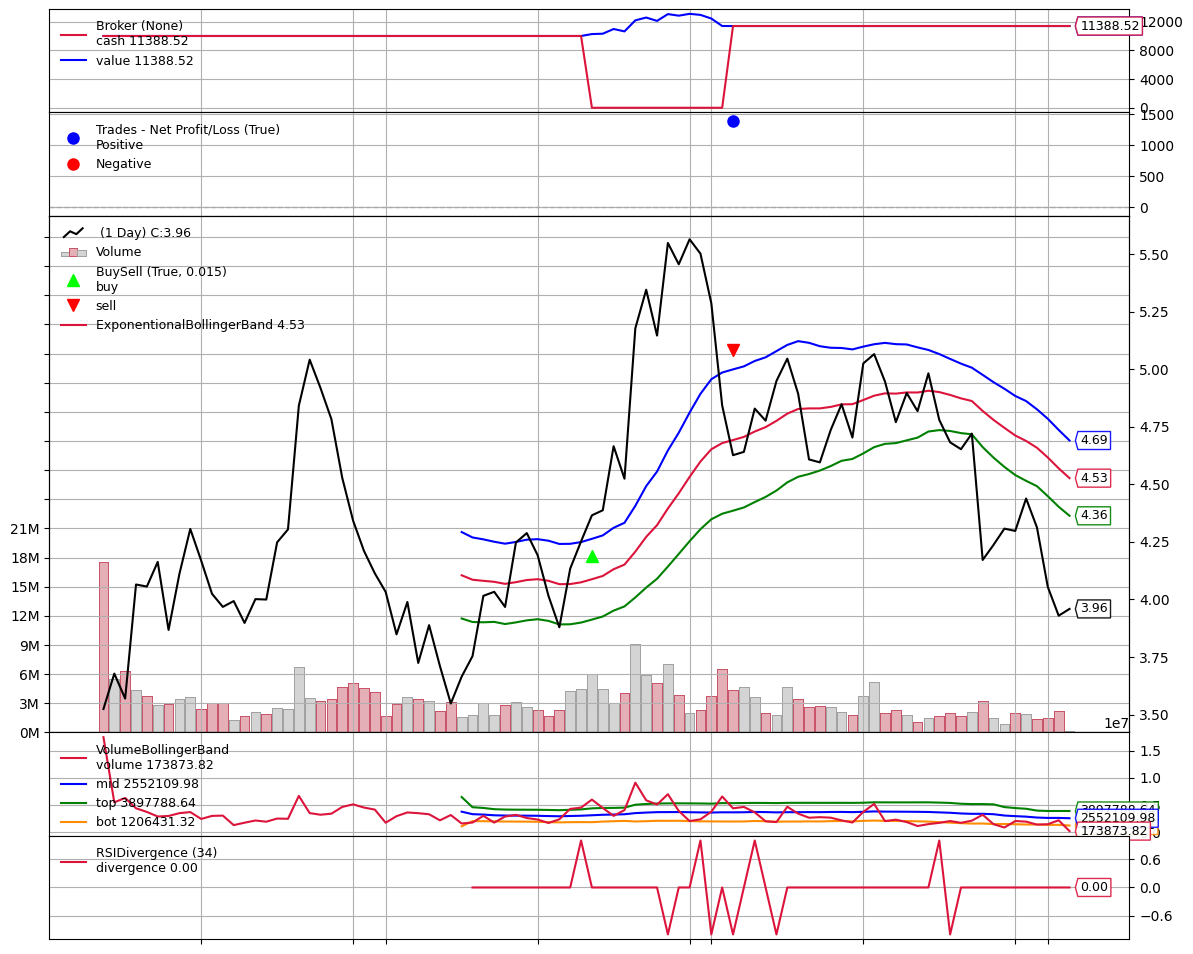

In [149]:

df = combined_df.copy()

for ticker in  tickers:
        print(ticker)
        # Set up the backtrader environment
        cerebro = bt.Cerebro()
        cerebro.addstrategy(BollingerBandLimitStrategy)

        
        # Filter the DataFrame for the given ticker
        ticker_data = df[df['Ticker'] == ticker]
        ticker_data.head()

        # Add your data here (example: DataFrame)
        data = bt.feeds.PandasData(dataname=ticker_data)  # Replace df with your DataFrame
        cerebro.adddata(data)

        # Add the analyzer to your cerebro instance
        cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trade_analysis")

        # Run the backtest
        result = cerebro.run()
        cerebro.plot()

        # Access the TradeAnalyzer from the results
        trade_analysis = result[0].analyzers.trade_analysis.get_analysis()

        # Display the trade list
        print(trade_analysis)

In [150]:
# Fetch OHLCV data (for example, the last 100 candles of 1-hour intervals)
data = bybit.fetch_ohlcv("shibusdt".upper(), timeframe='1d', limit=365)

# Transforming to DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Convert timestamp to datetime and create a new column 'date'
df['Date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Drop the original timestamp column
df.drop(columns=['timestamp'], inplace=True)
df.set_index('Date', inplace=True)

<IPython.core.display.Javascript object>

AutoOrderedDict([('total', AutoOrderedDict([('total', 9), ('open', 0), ('closed', 9)])), ('streak', AutoOrderedDict([('won', AutoOrderedDict([('current', 1), ('longest', 1)])), ('lost', AutoOrderedDict([('current', 0), ('longest', 5)]))])), ('pnl', AutoOrderedDict([('gross', AutoOrderedDict([('total', 14821.508776367358), ('average', 1646.834308485262)])), ('net', AutoOrderedDict([('total', 14821.508776367358), ('average', 1646.834308485262)]))])), ('won', AutoOrderedDict([('total', 3), ('pnl', AutoOrderedDict([('total', 21645.640920628983), ('average', 7215.213640209661), ('max', 17765.66335891279)]))])), ('lost', AutoOrderedDict([('total', 6), ('pnl', AutoOrderedDict([('total', -6824.13214426162), ('average', -1137.3553573769366), ('max', -2370.631015477047)]))])), ('long', AutoOrderedDict([('total', 9), ('pnl', AutoOrderedDict([('total', 14821.508776367358), ('average', 1646.834308485262), ('won', AutoOrderedDict([('total', 21645.640920628983), ('average', 7215.213640209661), ('max'

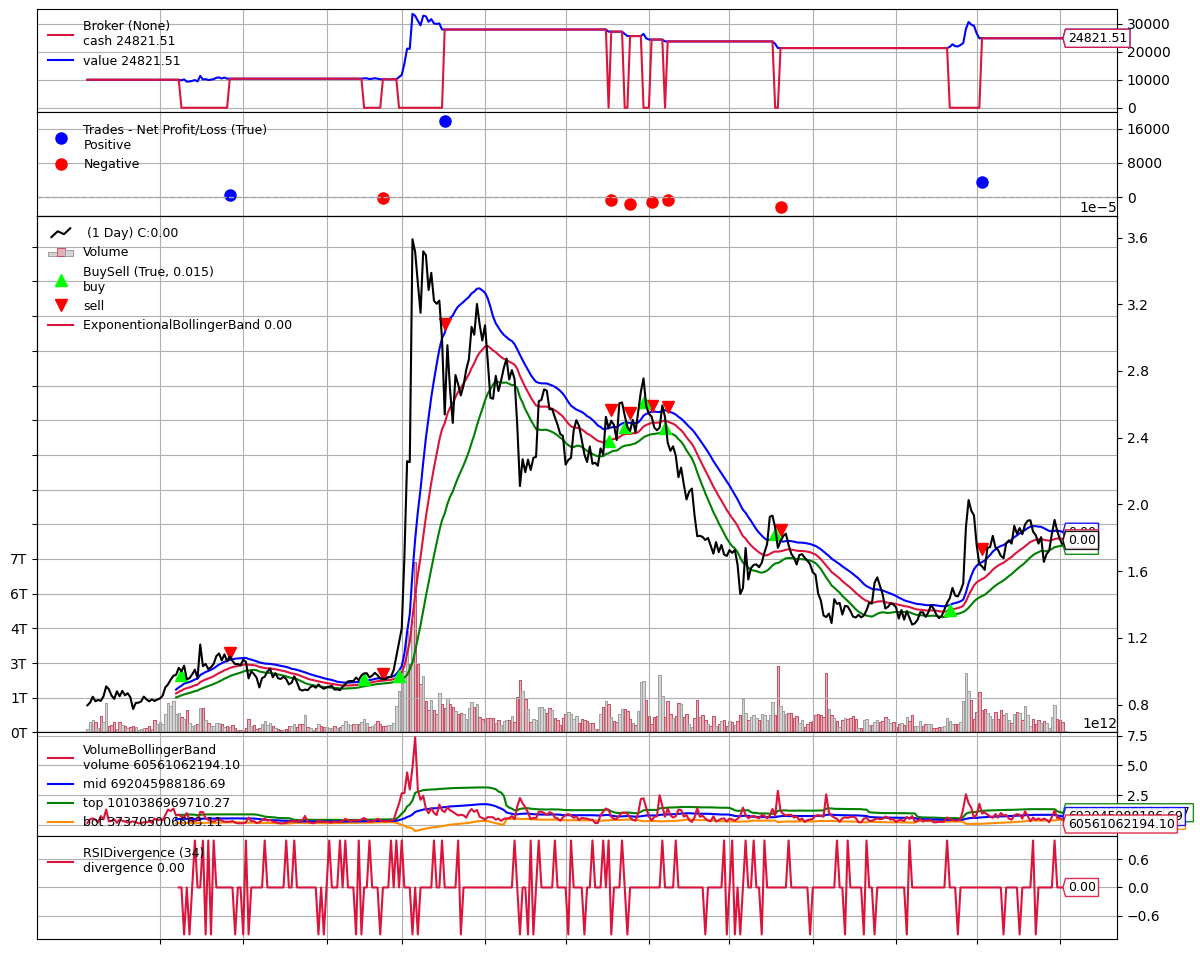

In [151]:
cerebro = bt.Cerebro()
cerebro.addstrategy(BollingerBandLimitStrategy)

# Add your data here (example: DataFrame)
data = bt.feeds.PandasData(dataname=df)  # Replace df with your DataFrame
cerebro.adddata(data)

# Add the analyzer to your cerebro instance
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trade_analysis")

# Run the backtest
result = cerebro.run()
cerebro.plot()

# Access the TradeAnalyzer from the results
trade_analysis = result[0].analyzers.trade_analysis.get_analysis()

# Display the trade list
print(trade_analysis)

In [156]:
# Fetch OHLCV data (for example, the last 100 candles of 1-hour intervals)
data = bybit.fetch_ohlcv("solusdt".upper(), timeframe='1d', limit=365)

# Transforming to DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Convert timestamp to datetime and create a new column 'date'
df['Date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Drop the original timestamp column
df.drop(columns=['timestamp'], inplace=True)
df.set_index('Date', inplace=True)

<IPython.core.display.Javascript object>

AutoOrderedDict([('total', AutoOrderedDict([('total', 7), ('open', 0), ('closed', 7)])), ('streak', AutoOrderedDict([('won', AutoOrderedDict([('current', 0), ('longest', 1)])), ('lost', AutoOrderedDict([('current', 4), ('longest', 4)]))])), ('pnl', AutoOrderedDict([('gross', AutoOrderedDict([('total', 5243.714757367119), ('average', 749.1021081953028)])), ('net', AutoOrderedDict([('total', 5243.714757367119), ('average', 749.1021081953028)]))])), ('won', AutoOrderedDict([('total', 2), ('pnl', AutoOrderedDict([('total', 7299.691922463464), ('average', 3649.845961231732), ('max', 5315.014797326653)]))])), ('lost', AutoOrderedDict([('total', 5), ('pnl', AutoOrderedDict([('total', -2055.977165096344), ('average', -411.19543301926876), ('max', -1235.1516905093424)]))])), ('long', AutoOrderedDict([('total', 7), ('pnl', AutoOrderedDict([('total', 5243.714757367119), ('average', 749.1021081953028), ('won', AutoOrderedDict([('total', 7299.691922463464), ('average', 3649.845961231732), ('max', 5

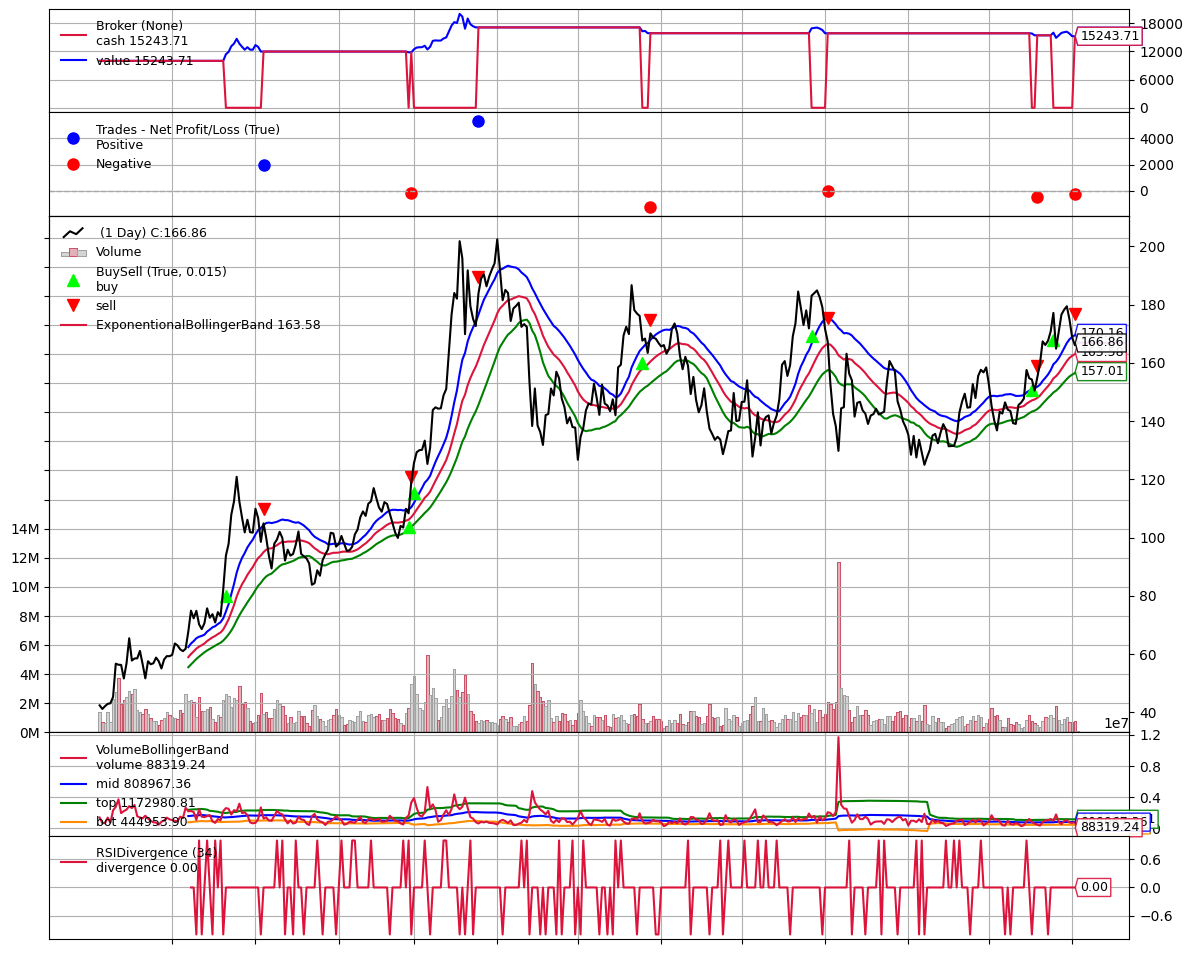

In [157]:
cerebro = bt.Cerebro()
cerebro.addstrategy(BollingerBandLimitStrategy)

# Add your data here (example: DataFrame)
data = bt.feeds.PandasData(dataname=df)  # Replace df with your DataFrame
cerebro.adddata(data)

# Add the analyzer to your cerebro instance
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trade_analysis")

# Run the backtest
result = cerebro.run()
cerebro.plot()

# Access the TradeAnalyzer from the results
trade_analysis = result[0].analyzers.trade_analysis.get_analysis()

# Display the trade list
print(trade_analysis)

In [154]:
# Fetch OHLCV data (for example, the last 100 candles of 1-hour intervals)
data = bybit.fetch_ohlcv("shibusdt".upper(), timeframe='1d', limit=365)

# Transforming to DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Convert timestamp to datetime and create a new column 'date'
df['Date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Drop the original timestamp column
df.drop(columns=['timestamp'], inplace=True)
df.set_index('Date', inplace=True)

<IPython.core.display.Javascript object>

AutoOrderedDict([('total', AutoOrderedDict([('total', 9), ('open', 0), ('closed', 9)])), ('streak', AutoOrderedDict([('won', AutoOrderedDict([('current', 1), ('longest', 1)])), ('lost', AutoOrderedDict([('current', 0), ('longest', 5)]))])), ('pnl', AutoOrderedDict([('gross', AutoOrderedDict([('total', 14821.508776367358), ('average', 1646.834308485262)])), ('net', AutoOrderedDict([('total', 14821.508776367358), ('average', 1646.834308485262)]))])), ('won', AutoOrderedDict([('total', 3), ('pnl', AutoOrderedDict([('total', 21645.640920628983), ('average', 7215.213640209661), ('max', 17765.66335891279)]))])), ('lost', AutoOrderedDict([('total', 6), ('pnl', AutoOrderedDict([('total', -6824.13214426162), ('average', -1137.3553573769366), ('max', -2370.631015477047)]))])), ('long', AutoOrderedDict([('total', 9), ('pnl', AutoOrderedDict([('total', 14821.508776367358), ('average', 1646.834308485262), ('won', AutoOrderedDict([('total', 21645.640920628983), ('average', 7215.213640209661), ('max'

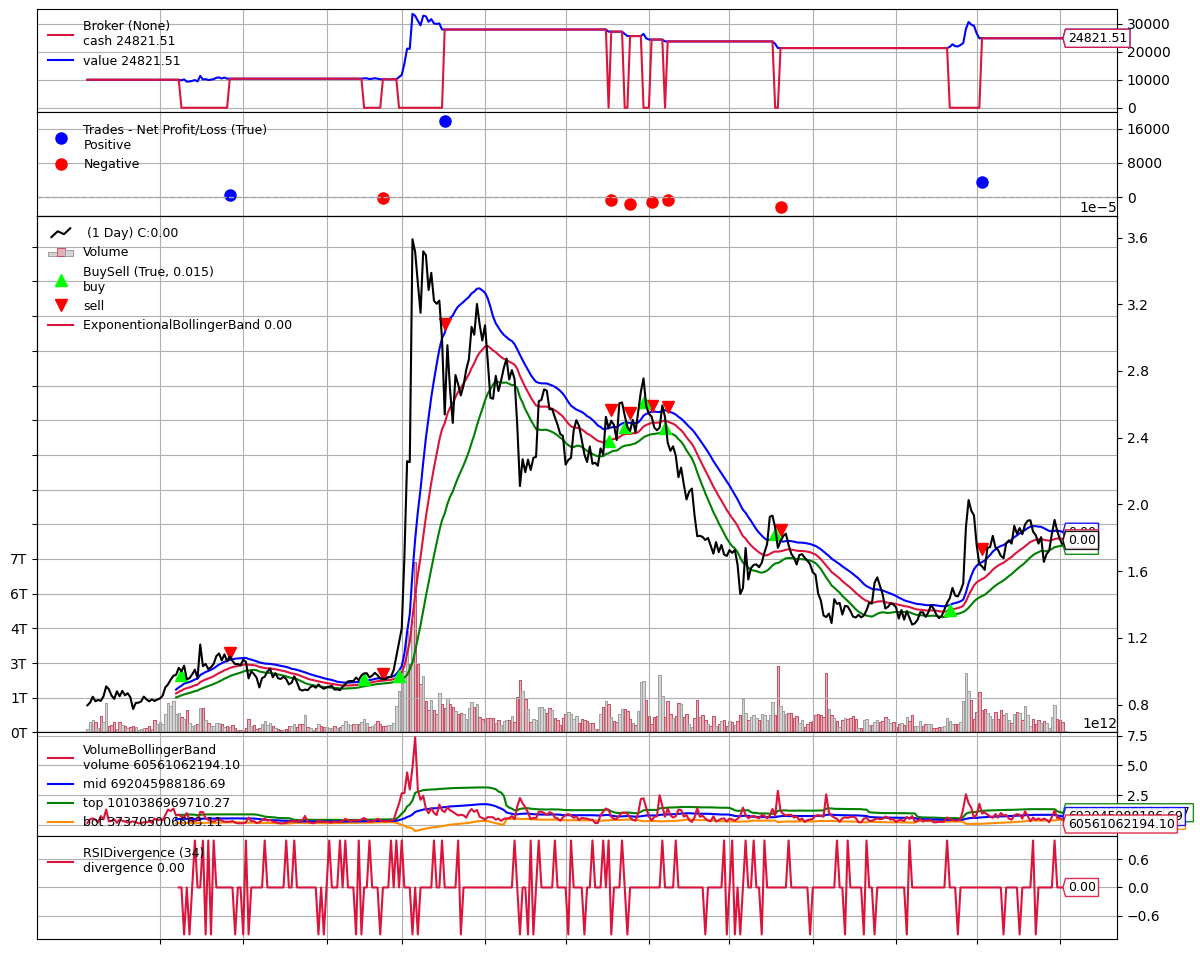

In [155]:
cerebro = bt.Cerebro()
cerebro.addstrategy(BollingerBandLimitStrategy)

# Add your data here (example: DataFrame)
data = bt.feeds.PandasData(dataname=df)  # Replace df with your DataFrame
cerebro.adddata(data)

# Add the analyzer to your cerebro instance
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trade_analysis")

# Run the backtest
result = cerebro.run()
cerebro.plot()

# Access the TradeAnalyzer from the results
trade_analysis = result[0].analyzers.trade_analysis.get_analysis()

# Display the trade list
print(trade_analysis)

In [158]:
# Fetch OHLCV data (for example, the last 100 candles of 1-hour intervals)
data = bybit.fetch_ohlcv("adausdt".upper(), timeframe='1d', limit=365)

# Transforming to DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Convert timestamp to datetime and create a new column 'date'
df['Date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Drop the original timestamp column
df.drop(columns=['timestamp'], inplace=True)
df.set_index('Date', inplace=True)

<IPython.core.display.Javascript object>

AutoOrderedDict([('total', AutoOrderedDict([('total', 3), ('open', 0), ('closed', 3)])), ('streak', AutoOrderedDict([('won', AutoOrderedDict([('current', 3), ('longest', 3)])), ('lost', AutoOrderedDict([('current', 0), ('longest', 0)]))])), ('pnl', AutoOrderedDict([('gross', AutoOrderedDict([('total', 3893.5840201483916), ('average', 1297.861340049464)])), ('net', AutoOrderedDict([('total', 3893.5840201483916), ('average', 1297.861340049464)]))])), ('won', AutoOrderedDict([('total', 3), ('pnl', AutoOrderedDict([('total', 3893.5840201483916), ('average', 1297.861340049464), ('max', 1985.6159655014876)]))])), ('lost', AutoOrderedDict([('total', 0), ('pnl', AutoOrderedDict([('total', 0.0), ('average', 0.0), ('max', 0.0)]))])), ('long', AutoOrderedDict([('total', 3), ('pnl', AutoOrderedDict([('total', 3893.5840201483916), ('average', 1297.861340049464), ('won', AutoOrderedDict([('total', 3893.5840201483916), ('average', 1297.861340049464), ('max', 1985.6159655014876)])), ('lost', AutoOrder

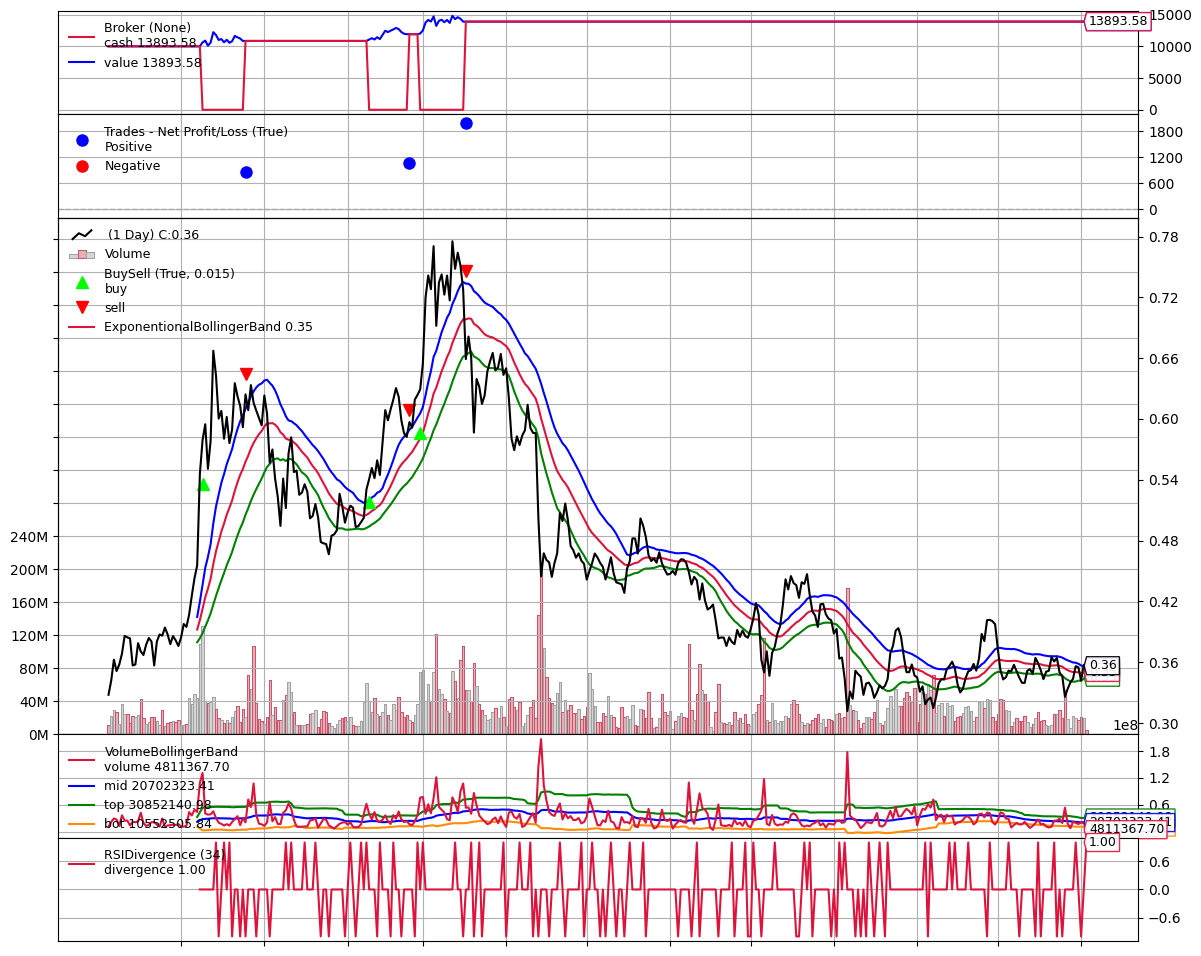

In [159]:
cerebro = bt.Cerebro()
cerebro.addstrategy(BollingerBandLimitStrategy)

# Add your data here (example: DataFrame)
data = bt.feeds.PandasData(dataname=df)  # Replace df with your DataFrame
cerebro.adddata(data)

# Add the analyzer to your cerebro instance
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="trade_analysis")

# Run the backtest
result = cerebro.run()
cerebro.plot()

# Access the TradeAnalyzer from the results
trade_analysis = result[0].analyzers.trade_analysis.get_analysis()

# Display the trade list
print(trade_analysis)